# PERT Simulation

First we will make sure that the PERT simulation is working correctly. We will use the following parameters:
- Optimistic: 6 days
- Most likely: 24 days
- Pessimistic: 50 days
- Lambda: 4

Worst case: 49.25369450371868 days
Best case: 6.148593414780638 days
Median: 25.08765970110381 days


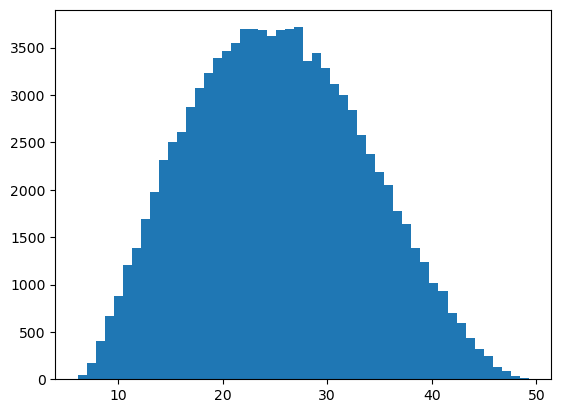

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import rot_x
from setuptools.command.rotate import rotate


def pert(a, b, c, *, size=1, lamb=4):
    r = c - a
    alpha = 1 + lamb * (b - a) / r
    beta = 1 + lamb * (c - b) / r
    return a + np.random.beta(alpha, beta, size=size) * r

arr = pert(6,24, 50, size=100000)

print("Worst case: {} days".format(arr.max()))
print("Best case: {} days".format(arr.min()))
print("Median: {} days".format(np.median(arr)))

plt.hist(arr, bins=50)
plt.show()

# Test the Critical Path library 

Now we will test the critical path library to make sure that it is working correctly. We will use the following parameters:
- A: 0 days
- B: 14 days
- C: 10 days
- D: 17 days
- E: 10 days
- F: 8 days
- G: 25 days
- H: 0 days
- A -> B -> D -> F -> H = 39 days
- A -> C -> E -> G -> H = 45 days

In [5]:
from criticalpath import Node
project = Node('Project')
a = Node('A', duration=0)
b = Node('B', duration=14)
c = Node('C', duration=10)
d = Node('D', duration=17)
e = Node('E', duration=10)
f = Node('F', duration=8)
g = Node('G', duration=25)
h = Node('H', duration=0)
project.add(a)
project.add(b)
project.add(c)
project.add(d)
project.add(e)
project.add(f)
project.add(g)
project.add(h)

project.link(a, b)
project.link(a, c)
project.link(b, d)
project.link(c, e)
project.link(d, f)
project.link(e, g)
project.link(f, h)
project.link(g, h)


project.update_all()
print(project.get_critical_path())
print(project.duration)

[A, C, E, G, H]
45


# Test Manual PERT Simulation for Exercice 1 

Now we will test the manual PERT simulation for the first exercice. We will use the following parameters:

- A: 0 days
- B: Optimistic: 14 days, Most likely: 20 days, Pessimistic: 40 days
- C: Optimistic: 10 days, Most likely: 15 days, Pessimistic: 20 days
- D: Optimistic: 17 days, Most likely: 25 days, Pessimistic: 55 days
- E: Optimistic: 10 days, Most likely: 14 days, Pessimistic: 20 days
- F: Optimistic: 8 days, Most likely: 12 days, Pessimistic: 20 days
- G: Optimistic: 25 days, Most likely: 30 days, Pessimistic: 50 days
- H: 0 days

**Using PERT formula  -> (O + 4M + P) / 6**

- A -> B -> D -> F -> H = 63.67 days
- A -> C -> E -> G -> H = 61.83 days



In [6]:
def manualpert(opt, most, pes):
    return (opt + 4*most + pes) / 6

#set up durations
a = 0
b = manualpert(14, 20, 40)
c = manualpert(10, 15, 20)
d = manualpert(17, 25, 55)
e = manualpert(10, 14, 20)
f = manualpert(8, 12, 20)
g = manualpert(25, 30, 50)
h = 0

#assign nodes
project = Node('Project')
a = Node('A', duration=0)
b = Node('B', duration=b)
c = Node('C', duration=c)
d = Node('D', duration=d)
e = Node('E', duration=e)
f = Node('F', duration=f)
g = Node('G', duration=g)
h = Node('H', duration=0)
project.add(a)
project.add(b)
project.add(c)
project.add(d)
project.add(e)
project.add(f)
project.add(g)
project.add(h)

#link the nodes 
project.link(a, b)
project.link(a, c)
project.link(b, d)
project.link(c, e)
project.link(d, f)
project.link(e, g)
project.link(f, h)
project.link(g, h)

project.update_all()
print(project.get_critical_path())
print(project.duration)


[A, B, D, F, H]
63.666666666666664


# Test Pert Simulation for Exercice 1 with Monte Carlo

Now we will test the PERT simulation for the first exercice using Monte Carlo. We will use the following parameters:

- A: 0 days
- B: Optimistic: 14 days, Most likely: 20 days, Pessimistic: 40 days
- C: Optimistic: 10 days, Most likely: 15 days, Pessimistic: 20 days
- D: Optimistic: 17 days, Most likely: 25 days, Pessimistic: 55 days
- E: Optimistic: 10 days, Most likely: 14 days, Pessimistic: 20 days
- F: Optimistic: 8 days, Most likely: 12 days, Pessimistic: 20 days
- G: Optimistic: 25 days, Most likely: 30 days, Pessimistic: 50 days
- H: 0 days

**Parameters**
- Number of simulations: 10,000
- Here we can see that the critical path could be changing depending on the simulation. The expected duration is 63.666 days.



In [185]:

simulation_size = 100000
a = 0
b = np.random.choice(pert(14, 20, 40, size=simulation_size))
c = np.random.choice(pert(10, 15, 20, size=simulation_size))
d = np.random.choice(pert(17, 25, 55, size=simulation_size))
e = np.random.choice(pert(10, 14, 20, size=simulation_size))
f = np.random.choice(pert(8, 12, 20, size=simulation_size))
g = np.random.choice(pert(25, 30, 50, size=simulation_size))
h = 0


print("Expected duration: {} days".format(np.mean(a + b + d + f + h)))

#assign nodes
project = Node('Project')
a = Node('A', duration=a)
b = Node('B', duration=b)
c = Node('C', duration=c)
d = Node('D', duration=d)
e = Node('E', duration=e)
f = Node('F', duration=f)
g = Node('G', duration=g)
h = Node('H', duration=h)
project.add(a)
project.add(b)
project.add(c)
project.add(d)
project.add(e)
project.add(f)
project.add(g)
project.add(h)


#link the nodes
project.link(a, b)
project.link(a, c)
project.link(b, d)
project.link(c, e)
project.link(d, f)
project.link(e, g)
project.link(f, h)
project.link(g, h)

project.update_all()
print(project.get_critical_path())
print(project.duration)


Expected duration: 52.54136093087263 days
[A, C, E, G, H]
57.80811338698953


# Test Simulation Example from class

Now we will test the simulation example from class. We will use the following parameters:

- A: Optimistic: 0 weeks, Most likely: 3 weeks, Pessimistic: 6 weeks
- B: Optimistic: 1 week, Most likely: 2 weeks, Pessimistic: 9 weeks
- C: Optimistic: 2 weeks, Most likely: 5 weeks, Pessimistic: 8 weeks
- D: Optimistic: 1 week, Most likely: 7 weeks, Pessimistic: 12 weeks
- E: Optimistic: 4 weeks, Most likely: 6 weeks, Pessimistic: 12 weeks
- F: Optimistic: 1 week, Most likely: 6 weeks, Pessimistic: 15 weeks
- G: Optimistic: 0 weeks, Most likely: 2 weeks, Pessimistic: 4 weeks
- H: Optimistic: 6 weeks, Most likely: 8 weeks, Pessimistic: 10 weeks

**Preceding tasks**
- A -> D
- B -> G
- C -> E
- D -> G
- E -> F
- F -> G
- G -> H


In [183]:
a = pert(0, 3, 6)
b = pert(1, 2, 9)
c = pert(2, 5, 8)
d = pert(1, 7, 12)
e = pert(4, 6, 12)
f = pert(1, 6, 15)
g = pert(0, 2, 4)
h = pert(6, 8, 10)

print("Expected duration: {} weeks".format(np.mean(a + d + g + h)))

#assign nodes
project = Node('Project')
a = Node('A', duration=a)
b = Node('B', duration=b)
c = Node('C', duration=c)
d = Node('D', duration=d)
e = Node('E', duration=e)
f = Node('F', duration=f)
g = Node('G', duration=g)
h = Node('H', duration=h)
project.add(a)
project.add(b)
project.add(c)
project.add(d)
project.add(e)
project.add(f)
project.add(g)
project.add(h)

#link the nodes
project.link(a, d)
project.link(b, g)
project.link(c, e)
project.link(d, g)
project.link(e, f)
project.link(f, g)
project.link(g, h)

project.update_all()
print(project.get_critical_path())
print(project.duration)



Expected duration: 18.54236263120275 weeks
[C, E, F, G, H]
[26.31696988]


# Test Simulation Example from class with Monte Carlo

prob 1.900000000000001% result 22.01414696768318
Mean: 28.359215400225086 weeks
Median: 28.26322894628484 weeks
Mode: 28 weeks
Worst case: 41.05316779785603 weeks
Best case: 18.30814216276493 weeks
Standard deviation: 3.35350047387415 weeks
Duration we are 95% confident wont be exceeded: 34.08515733003051 weeks
Duration we are 99% confident wont be exceeded: 36.396351305841435 weeks


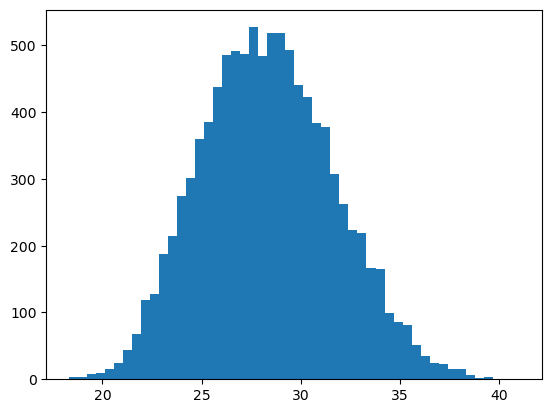

In [104]:
project_results = []
expectedWeeks = 22
for x in range(simulation_size):
    # a = np.random.choice(pert(0, 3, 6, size=simulation_size))
    # b = np.random.choice(pert(1, 2, 9, size=simulation_size))
    # c = np.random.choice(pert(2, 5, 8, size=simulation_size))
    # d = np.random.choice(pert(1, 7, 12, size=simulation_size))
    # e = np.random.choice(pert(4, 6, 12, size=simulation_size))
    # f = np.random.choice(pert(1, 6, 15, size=simulation_size))
    # g = np.random.choice(pert(0, 2, 4, size=simulation_size))
    # h = np.random.choice(pert(6, 8, 10, size=simulation_size))
    a = pert(0, 3, 6)[0]
    b = pert(1, 2, 9)[0]
    c = pert(2, 5, 8)[0]
    d = pert(1, 7, 12)[0]
    e = pert(4, 6, 12)[0]
    f = pert(1, 6, 15)[0]
    g = pert(0, 2, 4)[0]
    h = pert(6, 8, 10)[0]
    
    #assign nodes
    project = Node('Project')
    a = Node('A', duration=a)
    b = Node('B', duration=b)
    c = Node('C', duration=c)
    d = Node('D', duration=d)
    e = Node('E', duration=e)
    f = Node('F', duration=f)
    g = Node('G', duration=g)
    h = Node('H', duration=h)
    project.add(a)
    project.add(b)
    project.add(c)
    project.add(d)
    project.add(e)
    project.add(f)
    project.add(g)
    project.add(h)
        
    #link the nodes
    project.link(a, d)
    project.link(b, g)
    project.link(c, e)
    project.link(d, g)
    project.link(e, f)
    project.link(f, g)
    project.link(g, h)
    
    project.update_all()
    project_results.append(project.duration)

prob = 0 
while prob < 1:
    result = np.quantile(project_results, prob)
    if result <= expectedWeeks:
        prob += 0.001
    else:
        print("prob {}% result {}".format(prob * 100, result))
        break
  
print("Mean: {} weeks".format(np.mean(project_results)))
print("Median: {} weeks".format(np.median(project_results)))
print("Mode: {} weeks".format(np.argmax(np.bincount(project_results))))
print("Worst case: {} weeks".format(max(project_results)))
print("Best case: {} weeks".format(min(project_results)))
print("Standard deviation: {} weeks".format(np.std(project_results)))
plt.hist(project_results, bins=50)

print("Duration we are 95% confident wont be exceeded: {} weeks".format(np.percentile(project_results, 95)))
print("Duration we are 99% confident wont be exceeded: {} weeks".format(np.percentile(project_results, 99)))



# Implement automation reading from a file

Mean: 28.390487281165093 weeks
Median: 28.29979715932968 weeks
Mode: 28 weeks
Worst case: 40.29673874597897 weeks
Best case: 17.879063994192922 weeks
Standard deviation: 3.2908872103068494 weeks
Duration we are 95% confident wont be exceeded: 33.988815276033414 weeks
Duration we are 99% confident wont be exceeded: 36.19846999750505 weeks
prob 1.900000000000001% result 22.01988699305425
Critical Path Results
{'CEFGH': 9879, 'ADGH': 121}


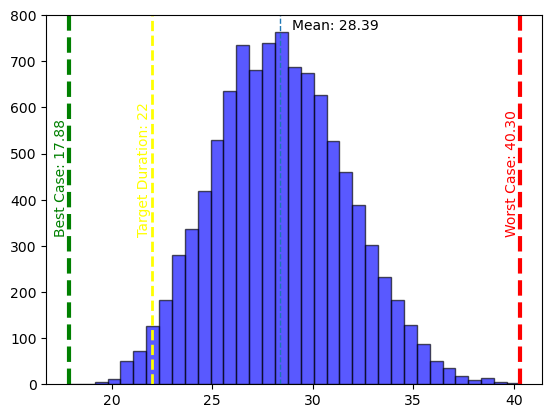

In [235]:
import csv
simulation_size = 10000
file_name = "data/data.csv"
targetDuration = 22

#auxiliary variables
project_results = []
project_results_critical_path = {}
cache_node_duration = {}

def prob_for(expectedWeeks, project_results):
    prob = 0 
    while prob < 1:
        result = np.quantile(project_results, prob)
        if result <= expectedWeeks:
            prob += 0.001
        else:
            print("prob {}% result {}".format(prob * 100, result))
            return prob * 100
def create_project_from_file(file):
    project = Node('Project')
    with open(file) as csvfile:
        csvreader = csv.reader(csvfile)
        # fields = next(csvreader)
        for line in csvreader:
            name = line[0]
            if name in cache_node_duration:
                duration = np.random.choice(cache_node_duration[name])
            else:
                cache_node_duration[name] = pert(int(line[1]), int(line[2]), int(line[3]), size=simulation_size)
                duration = np.random.choice(cache_node_duration[name])
            # duration = pert(int(line[1]), int(line[2]), int(line[3]))[0]
            # duration = np.random.choice(pert(int(line[1]), int(line[2]), int(line[3]), size=simulation_size))
            new_node = Node(name, duration=duration)
            project.add(new_node)
            if line[4] != "":
                for n in line[4].split("|"):
                    project.link(project.lookup_node(name=n), new_node)
    return project

for x in range(simulation_size):
    project = create_project_from_file(file_name)
    project.update_all()
    project_results.append(project.duration)
    s = ''.join(str(x) for x in project.get_critical_path())
    if s in project_results_critical_path:
        project_results_critical_path[s] += 1
    else:
        project_results_critical_path[s] = 1

print("Mean: {} weeks".format(np.mean(project_results)))
print("Median: {} weeks".format(np.median(project_results)))
print("Mode: {} weeks".format(np.argmax(np.bincount(project_results))))
print("Worst case: {} weeks".format(max(project_results)))
print("Best case: {} weeks".format(min(project_results)))
print("Standard deviation: {} weeks".format(np.std(project_results)))
print("Duration we are 95% confident wont be exceeded: {} weeks".format(np.percentile(project_results, 95)))
print("Duration we are 99% confident wont be exceeded: {} weeks".format(np.percentile(project_results, 99)))

prob_for(targetDuration, project_results)

plt.hist(project_results, bins=35, color='blue', edgecolor='k', alpha=0.65 )
min_ylim, max_ylim = plt.ylim()


plt.axvline(np.mean(project_results), linestyle='dashed', linewidth=1)
plt.text(np.mean(project_results)*1.02, max_ylim*0.96, 'Mean: {:.2f}'.format(np.mean(project_results)))

plt.axvline(targetDuration, color='yellow', linestyle='dashed', linewidth=2)
plt.text(targetDuration - .2, max_ylim * 0.4, 'Target Duration: {:}'.format(targetDuration), rotation=90, rotation_mode='anchor', color='yellow')

plt.axvline(np.min(project_results), color='green', linestyle='dashed', linewidth=3)
plt.text(np.min(project_results)-.2, max_ylim * 0.4, 'Best Case: {:.2f}'.format(np.min(project_results)), rotation=90, rotation_mode='anchor', color='green')

plt.axvline(np.max(project_results), color='red', linestyle='dashed', linewidth=3)
plt.text(np.max(project_results) -.2, max_ylim * 0.4, 'Worst Case: {:.2f}'.format(np.max(project_results)), rotation=90, rotation_mode='anchor', color='red')

print("Critical Path Results")
print(project_results_critical_path)
